In [1]:
import matplotlib.pyplot as plt

from maploc.demo import Demo
from maploc.osm.viz import GeoPlotter
from maploc.osm.tiling import TileManager
from maploc.osm.viz import Colormap, plot_nodes
from maploc.utils.viz_2d import plot_images

from maploc.osm.download import get_osm

%load_ext autoreload
%autoreload 2
import torch
from torchvision import transforms
from PIL import Image
import numpy as np


In [2]:
# It will also download the experiment orienternet
demo = Demo(num_rotations=256, device="cpu")

[2024-10-27 16:11:28 maploc INFO] Downloading https://cvg-data.inf.ethz.ch/OrienterNet_CVPR2023/orienternet_mgl.ckpt to /Users/lipefree/semester_project/semester-project-vita/CCVPE/experiments/orienternet_mgl.ckpt.


  0%|          | 0/660434743 [00:00<?, ?it/s]

/Users/lipefree/semester_project/semester-project-vita/CCVPE/maploc/demo.py:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(path, map_location=(lambda s

In [6]:
proj, bbox = demo.read_input_image(
    prior_latlon=(46.223181, 6.068631),
    tile_size_meters=102.4,  # for VIGOR dataset
)

#epfl : 46.223181, 6.068631

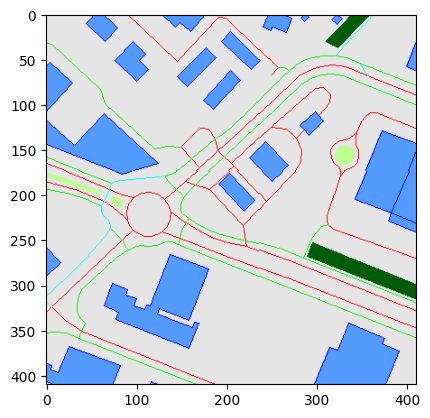

In [7]:
# We need to figure out pixe_per_meter for each dataset
ppm = 2 # To get 640x640 pixels at the end
tiler = TileManager.from_bbox(proj, bbox + 10, ppm)
canvas = tiler.query(bbox)
map_viz = Colormap.apply(canvas.raster)

plt.imshow(map_viz)

# feed canvas.raster

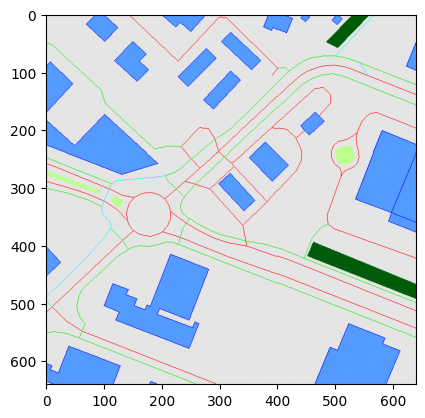

In [12]:
# We need to figure out pixe_per_meter for each dataset
ppm = 640/102.4/2# To get 640x640 pixels at the end
tiler = TileManager.from_bbox(proj, bbox, ppm)
canvas = tiler.query(bbox)
map_viz = Colormap.apply(canvas.raster)

plt.imshow(map_viz)

In [13]:
canvas.raster.shape

(3, 640, 640)

In [156]:
transform_sat = transforms.Compose([
    # resize
    transforms.Resize([512, 512]),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [158]:
raster = canvas.raster
tensor = torch.from_numpy(np.ascontiguousarray(raster)).float()
transform_sat(tensor).size()

torch.Size([3, 512, 512])

In [118]:
bbox_osm = proj.unproject(bbox + 10)
r = get_osm(bbox_osm)

In [119]:
len(r['elements'])

831

In [19]:
import os, pickle, gzip

root = "../../VIGOR"
city = "Seattle"
osm_tile_path = os.path.join(root, city, 'osm_tiles', 'data.pkl.gz')
with gzip.open(osm_tile_path, 'rb') as f:
    loaded_data = pickle.load(f)

satellite_47.55830507245264_-122.33846055576865.png



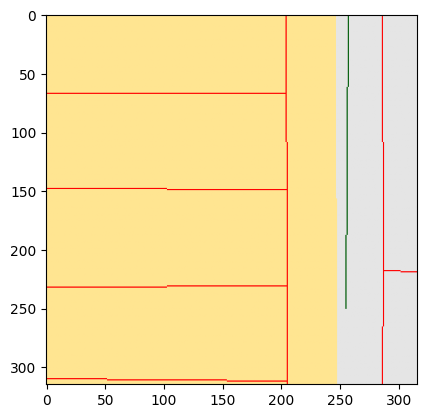

In [20]:
name, raster = loaded_data[0]
map_viz = Colormap.apply(raster)
print(name)
plt.imshow(map_viz)

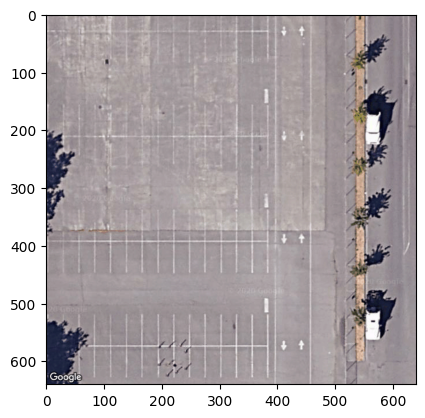

In [21]:
from PIL import Image

path = os.path.join('../../VIGOR', city, 'satellite', name[:-1])
# Load the PNG image
image = Image.open(path)
plt.imshow(image)